In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/participants_data_final/Participants_Data_Final"))

# Any results you write to the current directory are saved as output.

['Sample_submission.xlsx', 'Data_Train.xlsx', 'Data_Test.xlsx']


# Importing Data

In [2]:
train=pd.read_excel('../input/participants_data_final/Participants_Data_Final/Data_Train.xlsx')
test=pd.read_excel('../input/participants_data_final/Participants_Data_Final/Data_Test.xlsx')
s=pd.read_excel('../input/participants_data_final/Participants_Data_Final/Sample_submission.xlsx')
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TITLE,12690,113,QUICK BITES,4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RESTAURANT_ID,12690,NaN,NaN,NaN,7759.13,4504.87,0,3863.25,7740,11688.8,15573
CUISINES,12690,4155,South Indian,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME,12690,2689,11am – 11pm (Mon-Sun),1415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,12578,359,Chennai,2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCALITY,12592,1416,Gachibowli,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATING,12688,32,3.9,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VOTES,11486,1847,44 votes,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COST,12690,NaN,NaN,NaN,655.252,627.004,20,300,500,800,14000


## Finding/Removing duplicates

In [4]:
train[train['RESTAURANT_ID']==6571]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1212,CASUAL DINING,6571,"Chinese, Thai, Momos",11am – 3am (Mon-Sun),Gurgaon,DLF Phase 4,4.0,690 votes,500
1825,CASUAL DINING,6571,"Chinese, Thai, Momos",11am – 3am (Mon-Sun),Gurgaon,DLF Phase 4,4.0,690 votes,500


In [5]:
train[train.duplicated()==True]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1825,CASUAL DINING,6571,"Chinese, Thai, Momos",11am – 3am (Mon-Sun),Gurgaon,DLF Phase 4,4.0,690 votes,500
3523,QUICK BITES,4449,"Fast Food, Burger, Sandwich","9:30am – 10:30pm (Mon-Sat),11am – 11pm (Sun)",Thane,Thane West,NEW,NaN,250
4499,CASUAL DINING,6663,"North Indian, Biryani",7pm – 12midnight (Mon-Sun),Andheri West,Andheri Lokhandwala,4.0,336 votes,650
4556,None,13001,"Japanese, Sushi",12noon – 10pm (Mon-Sun),Mumbai,Juhu,3.9,117 votes,700
6256,QUICK BITES,10042,North Indian,7am – 11pm (Mon-Sun),New Delhi,Ashok Vihar Phase 2,3.9,1487 votes,200
8916,QUICK BITES,8424,Street Food,10:30am – 12:30AM (Mon-Sun),Mumbai,Girgaum,3.9,280 votes,250
9018,None,11200,"Burger, Beverages",12noon – 4am (Mon-Sun),New Delhi,Rajinder Nagar,4.0,169 votes,500
9410,CASUAL DINING,12477,"South Indian, Chettinad, Kerala, Sri Lankan","12noon – 3:30pm, 7pm – 11pm (Mon-Fri),8am –...",Bangalore,Indiranagar,4.0,1234 votes,800
10028,"MICROBREWERY,CASUAL DINING",3745,"Modern Indian, Finger Food, Sushi, Bar Food, I...",12noon – 12midnight (Mon-Sun),Gurgaon,Sector 29,4.7,636 votes,1500
10039,CASUAL DINING,6433,"Biryani, Hyderabadi, North Indian, Chinese","11:30am – 4pm, 6:30pm – 11pm (Mon-Sun)",Bangalore,Old Madras Road,3.8,275 votes,600


In [6]:
train[train['RESTAURANT_ID'].isin(test['RESTAURANT_ID'])]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
15,"CASUAL DINING,IRANI CAFE",12401,"Parsi, Hyderabadi","11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Jubilee Hills,4.5,2499 votes,1400
34,BEVERAGE SHOP,1494,"Beverages, Coffee, Tea",6am – 11pm (Mon-Sun),Chennai,Besant Nagar,2.7,132 votes,500
59,CASUAL DINING,638,"North Indian, South Indian, Fast Food, Chinese",7am – 11:30pm (Mon-Sun),Chennai,T. Nagar,3.9,196 votes,800
66,QUICK BITES,11999,Arabian,11am – 11pm (Mon-Sun),Bangalore,BTM,3.4,6 votes,100
67,CASUAL DINING,13569,"North Indian, Mughlai, Chinese, Seafood",12:30pm – 1:30am (Mon-Sun),Mumbai,Kalwa,4.3,1185 votes,850
72,CASUAL DINING,10614,"North Indian, Mughlai",12noon – 12midnight (Mon-Sun),Mumbai,Kurla Complex,4.3,380 votes,1800
77,QUICK BITES,7173,"Rolls, North Indian, Mughlai","11:30am – 11pm (Mon-Thu),11:30am – 1am (Fri-Sun)",Bangalore,Electronic City,3.4,72 votes,400
103,CASUAL DINING,6413,"Hyderabadi, Andhra, North Indian, Chinese, Sou...","12noon – 4pm, 7pm – 11pm (Mon-Sun)",Bangalore,Whitefield,4.0,284 votes,800
115,QUICK BITES,4634,"Burger, Fast Food, Roast Chicken, Finger Food",11am – 11pm (Mon-Sun),Bangalore,JP Nagar,4.0,66 votes,300


In [7]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TITLE,4231,86,QUICK BITES,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RESTAURANT_ID,4231,NaN,NaN,NaN,7791.44,4458.8,3,3908.5,7798,11634,15572
CUISINES,4231,1727,"North Indian, Chinese",213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME,4231,1183,11am – 11pm (Mon-Sun),447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CITY,4196,151,Bangalore,686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCALITY,4201,834,Kakkanad,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATING,4229,31,3.8,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VOTES,3829,1136,6 votes,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some insights

In [8]:
train[train['RATING']=='NEW']['TITLE'].value_counts()

QUICK BITES                   345
None                          126
CASUAL DINING                  92
CAFÉ                           35
BEVERAGE SHOP                  21
DESSERT PARLOR                 21
CASUAL DINING,BAR              13
BAKERY                         11
BAR,CASUAL DINING               8
BAR                             3
FOOD TRUCK                      3
BEVERAGE SHOP,QUICK BITES       3
LOUNGE                          2
MICROBREWERY,CASUAL DINING      2
SWEET SHOP,QUICK BITES          2
BAKERY,QUICK BITES              2
CAFÉ,BAKERY                     2
PUB,CASUAL DINING               1
QUICK BITES,DESSERT PARLOR      1
CASUAL DINING,CLUB              1
SWEET SHOP                      1
COCKTAIL BAR                    1
CAFÉ,QUICK BITES                1
FOOD COURT                      1
CLUB                            1
DHABA                           1
LOUNGE,BAR                      1
CASUAL DINING,BAKERY            1
DESSERT PARLOR,QUICK BITES      1
DESSERT PARLOR

In [9]:
train[train['TITLE']=='QUICK BITES']['COST'].describe()

count    4218.000000
mean      347.302750
std       145.663978
min        50.000000
25%       250.000000
50%       300.000000
75%       400.000000
max      1300.000000
Name: COST, dtype: float64

In [10]:
train[train['VOTES'].isnull()==True].describe(include='all')

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,1204,1204.000000,1204,1204,1185,1184,1202,0.0,1204.000000
unique,47,NaN,460,376,52,398,2,0.0,NaN
top,QUICK BITES,NaN,South Indian,11am – 11pm (Mon-Sun),Kochi,Fort Kochi,NEW,NaN,NaN
freq,535,NaN,76,161,523,52,707,NaN,NaN
mean,NaN,7464.739203,NaN,NaN,NaN,NaN,NaN,NaN,401.071429
std,NaN,4458.280812,NaN,NaN,NaN,NaN,NaN,NaN,310.536658
min,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,3759.000000,NaN,NaN,NaN,NaN,NaN,NaN,200.000000
50%,NaN,7053.000000,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,11247.500000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [11]:
train[train['CITY']=='Kochi']['RATING'].value_counts()

-      432
NEW     90
3.3     70
3.5     66
3.4     66
3.7     66
3.6     62
3.1     57
3.2     55
3.9     42
3.8     41
3.0     40
2.9     39
4.0     32
4.1     22
2.8     19
4.2     18
2.7     12
4.3     11
4.4     10
4.5      7
2.6      7
2.5      4
4.7      3
4.6      2
2.1      1
2.2      1
2.4      1
2.3      1
4.8      1
Name: RATING, dtype: int64

In [12]:
train.groupby('TITLE')['COST'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
TITLE,,,,,,,,
FINE DINING,308.0,2958.928571,1365.057117,350.0,2000.0,2800.0,3500.0,14000.0
"COCKTAIL BAR,CASUAL DINING",3.0,2833.333333,960.902354,1800.0,2400.0,3000.0,3350.0,3700.0
"FINE DINING,BAR",32.0,2825.000000,766.643291,1500.0,2450.0,2550.0,3000.0,5000.0
CLUB,20.0,2555.000000,1326.441619,1100.0,1500.0,2000.0,3250.0,5000.0
"FINE DINING,LOUNGE",8.0,2550.000000,671.884344,1200.0,2375.0,2750.0,3000.0,3200.0
"BAR,MICROBREWERY",1.0,2500.000000,NaN,2500.0,2500.0,2500.0,2500.0,2500.0
COCKTAIL BAR,3.0,2266.666667,251.661148,2000.0,2150.0,2300.0,2400.0,2500.0
"CLUB,BAR",2.0,2150.000000,1202.081528,1300.0,1725.0,2150.0,2575.0,3000.0
"BAR,FINE DINING",6.0,2116.666667,354.494946,1500.0,2025.0,2150.0,2350.0,2500.0


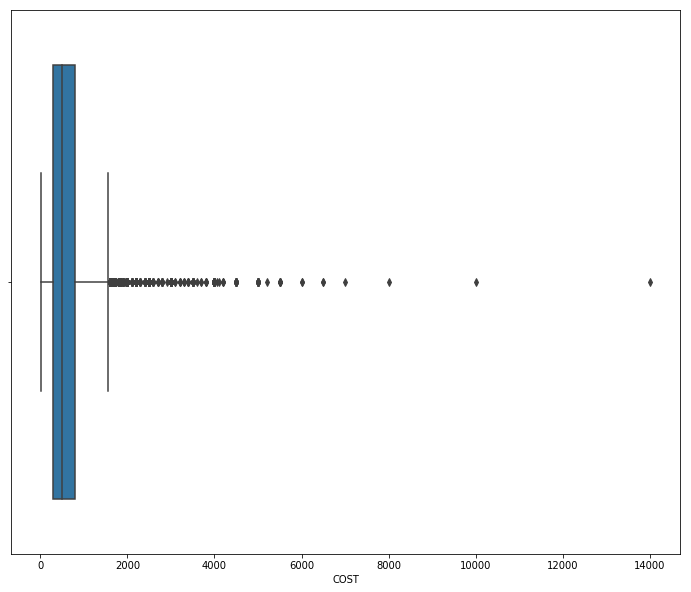

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.boxplot(train['COST'])

## Missing values and Feature engineering

In [14]:
train.iloc[246,4]='Kochi'
train.iloc[817,4]='Mumbai'
train.iloc[5149,4]='Navi Mumbai'
train.iloc[5297,4]='Kochi'
train.iloc[6397,4]='Mumbai'
train.iloc[6451,4]='Chennai'
train.iloc[8456,4]='Bangalore'
train.iloc[8735,4]='Chennai'
train.iloc[9121,4]='Bangalore'
train.iloc[9268,4]='Kochi'
train.iloc[10200,4]='Mumbai'
train.iloc[10704,4]='Chennai'
train.iloc[11491,4]='Chennai'
train.iloc[12314,4]='Hyderabad'
train.iloc[12447,4]='Hyderabad'

test.iloc[169,4]='Chennai'
test.iloc[710,4]='Chennai'
test.iloc[1354,4]='Uttar Pradesh'
test.iloc[3621,4]='Mumbai'
test.iloc[4167,4]='Chennai'

train.iloc[1365,0]='Kerela'
train=train[train.duplicated()==False]
df=train.append(test,ignore_index=True)
df.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [15]:
# Feature Engineering
train['COST'].describe()

count    12665.000000
mean       655.400790
std        627.389831
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

In [16]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY               97
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [17]:
train['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [18]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY               97
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [19]:
import re
def timeclean(v):
    return re.sub("[^a-zA-Z0-9:]", " ",v)
df['TITLE']=df['TITLE'].apply( lambda x :" ".join(x.split(",")))
df['CUISINES']=df['CUISINES'].apply( lambda x :" ".join(x.split(",")))
df['CITY'].fillna('NOTFOUND',inplace=True)
df['LOCALITY'].fillna('NOTFOUND',inplace=True)
df['LOCATION']=df['CITY']+' '+df['LOCALITY']
df['CITY']=df['CITY'].apply(lambda x : re.sub("[^0-9a-zA-Z]", " ",x))
df['Serves2Time']=df['TIME'].apply(lambda x :1 if len(x.split(','))>1 else 0)
df['TIME']=df['TIME'].apply(timeclean)
df['RATING'].replace({'NEW': '3.7',np.nan:'0.0','-':'3.7'},inplace=True)
df['RATING']=df['RATING'].astype(np.float64)
df['RATING.BINS']=pd.cut(df['RATING'],4,labels=['Sly','Fair','Good','Great']).astype(np.object)

df['VOTES'].fillna('0 votes',inplace=True)
df['VOTES']=df['VOTES'].apply(lambda x : int(x.split(' ')[0]))
df['VOTES.BINS']=pd.cut(df['VOTES'],5,labels=['Sly','Fair','Good','Great','Awesome']).astype(np.object)
df=pd.get_dummies(df,columns=['RATING.BINS','VOTES.BINS'],drop_first=True)

df.drop(['RESTAURANT_ID'],axis=1,inplace=True)
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,TIME,TITLE,VOTES,LOCATION,Serves2Time,RATING.BINS_Good,RATING.BINS_Great,RATING.BINS_Sly,VOTES.BINS_Fair,VOTES.BINS_Good,VOTES.BINS_Sly
0,Thane,1200.0,Malwani Goan North Indian,Dombivali East,3.6,11am 4pm 7:30pm 11:30pm Mon Sun,CASUAL DINING,49,Thane Dombivali East,1,1,0,0,0,0,1
1,Chennai,1500.0,Asian Modern Indian Japanese,Ramapuram,4.2,6pm 11pm Mon Sun,CASUAL DINING BAR,30,Chennai Ramapuram,0,0,1,0,0,0,1
2,Chennai,800.0,North Indian Chinese Biryani Hyderabadi,Saligramam,3.8,11am 3:30pm 7pm 11pm Mon Sun,CASUAL DINING,221,Chennai Saligramam,1,0,1,0,0,0,1
3,Mumbai,800.0,Tibetan Chinese,Bandra West,4.1,11:30am 1am Mon Sun,QUICK BITES,24,Mumbai Bandra West,0,0,1,0,0,0,1
4,Mumbai,300.0,Desserts,Lower Parel,3.8,11am 1am Mon Sun,DESSERT PARLOR,165,Mumbai Lower Parel,0,0,1,0,0,0,1


In [20]:
df=df.merge(df.groupby('TITLE')['RATING'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'trating_mean','sum':'trating_sum',
                                                                                       'min':'trating_min','max':'trating_max','quantile':'trating_quant'}).reset_index(),on='TITLE',how='left')

df=df.merge(df.groupby('TITLE')['VOTES'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'tVOTES_mean','sum':'tVOTES_sum',
                                                                                       'min':'tVOTES_min','max':'tVOTES_max','quantile':'tVOTES_quant'}).reset_index(),on='TITLE',how='left')

df=df.merge(df.groupby('CUISINES')['VOTES'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'cVOTES_mean','sum':'cVOTES_sum',
                                                                                       'min':'cVOTES_min','max':'cVOTES_max','quantile':'cVOTES_quant'}).reset_index(),on='CUISINES',how='left')
df=df.merge(df.groupby('CUISINES')['RATING'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'cRATING_mean','sum':'cRATING_sum',
                                                                                       'min':'cRATING_min','max':'cRATING_max','quantile':'cRATING_quant'}).reset_index(),on='CUISINES',how='left')


df=df.merge(df.groupby('CITY')['RATING'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'CITYrating_mean','sum':'CITYrating_sum',
                                                                                       'min':'CITYrating_min','max':'CITYrating_max','quantile':'CITYrating_quant'}).reset_index(),on='CITY',how='left')

df=df.merge(df.groupby('CITY')['VOTES'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'CITYVOTES_mean','sum':'CITYVOTES_sum',
                                                                                       'min':'CITYVOTES_min','max':'CITYVOTES_max','quantile':'CITYVOTES_quant'}).reset_index(),on='CITY',how='left')

df=df.merge(df.groupby('LOCALITY')['VOTES'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'LOCALITYVOTES_mean','sum':'LOCALITYVOTES_sum',
                                                                                       'min':'LOCALITYVOTES_min','max':'LOCALITYVOTES_max','quantile':'LOCALITYVOTES_quant'}).reset_index(),on='LOCALITY',how='left')
df=df.merge(df.groupby('LOCALITY')['RATING'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'LOCALITYRATING_mean','sum':'LOCALITYRATING_sum',
                                                                                       'min':'LOCALITYRATING_min','max':'LOCALITYRATING_max','quantile':'LOCALITYRATING_quant'}).reset_index(),on='LOCALITY',how='left')
df=df.merge(df.groupby('TIME')['VOTES'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'TIMEVOTES_mean','sum':'TIMEVOTES_sum',
                                                                                       'min':'TIMEVOTES_min','max':'TIMEVOTES_max','quantile':'TIMEVOTES_quant'}).reset_index(),on='TIME',how='left')
df=df.merge(df.groupby('TIME')['RATING'].agg(['mean','sum','min','max','quantile']).rename(columns={'mean':'TIMERATING_mean','sum':'TIMERATING_sum',
                                                                                       'min':'TIMERATING_min','max':'TIMERATING_max','quantile':'TIMERATING_quant'}).reset_index(),on='TIME',how='left')

In [21]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,TIME,TITLE,VOTES,LOCATION,Serves2Time,RATING.BINS_Good,RATING.BINS_Great,RATING.BINS_Sly,VOTES.BINS_Fair,VOTES.BINS_Good,VOTES.BINS_Sly,trating_mean,trating_sum,trating_min,trating_max,trating_quant,tVOTES_mean,tVOTES_sum,tVOTES_min,tVOTES_max,tVOTES_quant,cVOTES_mean,cVOTES_sum,cVOTES_min,cVOTES_max,cVOTES_quant,cRATING_mean,cRATING_sum,cRATING_min,cRATING_max,cRATING_quant,CITYrating_mean,CITYrating_sum,CITYrating_min,CITYrating_max,CITYrating_quant,CITYVOTES_mean,CITYVOTES_sum,CITYVOTES_min,CITYVOTES_max,CITYVOTES_quant,LOCALITYVOTES_mean,LOCALITYVOTES_sum,LOCALITYVOTES_min,LOCALITYVOTES_max,LOCALITYVOTES_quant,LOCALITYRATING_mean,LOCALITYRATING_sum,LOCALITYRATING_min,LOCALITYRATING_max,LOCALITYRATING_quant,TIMEVOTES_mean,TIMEVOTES_sum,TIMEVOTES_min,TIMEVOTES_max,TIMEVOTES_quant,TIMERATING_mean,TIMERATING_sum,TIMERATING_min,TIMERATING_max,TIMERATING_quant
0,Thane,1200.0,Malwani Goan North Indian,Dombivali East,3.6,11am 4pm 7:30pm 11:30pm Mon Sun,CASUAL DINING,49,Thane Dombivali East,1,1,0,0,0,0,1,3.770971,18485.3,2.0,4.9,3.8,489.814973,2401073,0,41186,224.0,49.000000,49,49,49,49.0,3.600000,3.6,3.6,3.6,3.60,3.906034,453.1,3.2,4.8,3.9,195.715517,22703,0,1842,77.0,214.428571,7505,0,664,151.0,3.688571,129.1,3.2,4.0,3.70,49.000000,49,49,49,49.0,3.600000,3.6,3.6,3.6,3.6
1,Chennai,1500.0,Asian Modern Indian Japanese,Ramapuram,4.2,6pm 11pm Mon Sun,CASUAL DINING BAR,30,Chennai Ramapuram,0,0,1,0,0,0,1,4.048380,1874.4,2.4,4.9,4.1,915.213823,423744,0,7595,514.0,30.000000,30,30,30,30.0,4.200000,4.2,4.2,4.2,4.20,3.630584,10387.1,2.0,4.9,3.6,206.867529,591848,0,9698,79.0,104.185185,5626,0,571,79.0,3.572222,192.9,2.8,4.3,3.60,113.111111,3054,0,691,50.0,3.674074,99.2,2.9,4.6,3.6
2,Chennai,800.0,North Indian Chinese Biryani Hyderabadi,Saligramam,3.8,11am 3:30pm 7pm 11pm Mon Sun,CASUAL DINING,221,Chennai Saligramam,1,0,1,0,0,0,1,3.770971,18485.3,2.0,4.9,3.8,489.814973,2401073,0,41186,224.0,490.000000,1960,187,1186,293.5,3.650000,14.6,3.1,4.0,3.75,3.630584,10387.1,2.0,4.9,3.6,206.867529,591848,0,9698,79.0,90.833333,1090,21,221,80.0,3.550000,42.6,2.7,4.2,3.65,282.294118,4799,27,956,221.0,3.752941,63.8,3.3,4.3,3.8
3,Mumbai,800.0,Tibetan Chinese,Bandra West,4.1,11:30am 1am Mon Sun,QUICK BITES,24,Mumbai Bandra West,0,0,1,0,0,0,1,3.657686,20581.8,0.0,4.9,3.7,199.057580,1120097,0,7245,76.0,436.666667,1310,24,795,491.0,4.066667,12.2,4.0,4.1,4.10,3.915568,9029.3,2.4,4.9,3.9,551.199913,1271067,0,7926,276.0,545.513514,40368,0,2883,270.5,4.013514,297.0,3.0,4.6,4.00,1124.636364,49484,17,6457,493.5,4.036364,177.6,3.1,4.6,4.1
4,Mumbai,300.0,Desserts,Lower Parel,3.8,11am 1am Mon Sun,DESSERT PARLOR,165,Mumbai Lower Parel,0,0,1,0,0,0,1,3.877318,1965.8,2.4,4.9,3.9,200.834320,101823,0,3871,76.0,157.598291,18439,0,1822,55.0,3.866667,452.4,3.0,4.9,3.80,3.915568,9029.3,2.4,4.9,3.9,551.199913,1271067,0,7926,276.0,1063.345679,86131,0,5724,651.0,4.086420,331.0,3.4,4.9,4.10,675.519481,104030,0,9976,337.5,3.940260,606.8,2.0,4.8,3.9


In [22]:
df_train = df[df['COST'].isnull()==False]
df_test = df[df['COST'].isnull()==True]
print(df_train.shape,df_test.shape)

(12665, 66) (4231, 66)


### TF-ID

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
v_city = TfidfVectorizer(ngram_range=(1,1),stop_words="english", analyzer='word')
city_tr =v_city.fit_transform(df_train['CITY'])
city_ts =v_city.transform(df_test['CITY'])

c_city = CountVectorizer(ngram_range=(1,1),stop_words="english", analyzer='word')
ccity_tr =c_city.fit_transform(df_train['CITY'])
ccity_ts =c_city.transform(df_test['CITY'])

v_cuisine = TfidfVectorizer(ngram_range=(1,1),stop_words="english", analyzer='word')
cui_tr =v_cuisine.fit_transform(df_train['CUISINES'])
cui_ts =v_cuisine.transform(df_test['CUISINES'])

v_local = TfidfVectorizer(ngram_range=(1,2),stop_words="english", analyzer='word')
local_tr =v_local.fit_transform(df_train['LOCALITY'])
local_ts =v_local.transform(df_test['LOCALITY'])

v_time = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
time_tr =v_time.fit_transform(df_train['TIME'])
time_ts =v_time.transform(df_test['TIME'])

v_title = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
title_tr =v_title.fit_transform(df_train['TITLE'])
title_ts =v_title.transform(df_test['TITLE'])

v_loc = TfidfVectorizer(ngram_range=(1,2),stop_words="english", analyzer='word')
loc_tr =v_loc.fit_transform(df_train['LOCATION'])
loc_ts =v_loc.transform(df_test['LOCATION'])

In [24]:
df.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'TIME', 'TITLE',
       'VOTES', 'LOCATION', 'Serves2Time', 'RATING.BINS_Good',
       'RATING.BINS_Great', 'RATING.BINS_Sly', 'VOTES.BINS_Fair',
       'VOTES.BINS_Good', 'VOTES.BINS_Sly', 'trating_mean', 'trating_sum',
       'trating_min', 'trating_max', 'trating_quant', 'tVOTES_mean',
       'tVOTES_sum', 'tVOTES_min', 'tVOTES_max', 'tVOTES_quant', 'cVOTES_mean',
       'cVOTES_sum', 'cVOTES_min', 'cVOTES_max', 'cVOTES_quant',
       'cRATING_mean', 'cRATING_sum', 'cRATING_min', 'cRATING_max',
       'cRATING_quant', 'CITYrating_mean', 'CITYrating_sum', 'CITYrating_min',
       'CITYrating_max', 'CITYrating_quant', 'CITYVOTES_mean', 'CITYVOTES_sum',
       'CITYVOTES_min', 'CITYVOTES_max', 'CITYVOTES_quant',
       'LOCALITYVOTES_mean', 'LOCALITYVOTES_sum', 'LOCALITYVOTES_min',
       'LOCALITYVOTES_max', 'LOCALITYVOTES_quant', 'LOCALITYRATING_mean',
       'LOCALITYRATING_sum', 'LOCALITYRATING_min', 'LOCALITYRATING_max',
   

In [25]:

col=[ 'RATING', 
       'VOTES', 'RATING.BINS_Good',
       'RATING.BINS_Great', 'RATING.BINS_Sly', 'VOTES.BINS_Fair',
       'VOTES.BINS_Good', 'VOTES.BINS_Sly', 'trating_mean', 'trating_sum',
       'trating_min', 'trating_max', 'trating_quant', 'tVOTES_mean',
       'tVOTES_sum', 'tVOTES_min', 'tVOTES_max', 'tVOTES_quant', 'cVOTES_mean',
       'cVOTES_sum', 'cVOTES_min', 'cVOTES_max', 'cVOTES_quant',
       'cRATING_mean', 'cRATING_sum', 'cRATING_min', 'cRATING_max',
       'cRATING_quant', 'CITYrating_mean', 'CITYrating_sum', 'CITYrating_min',
       'CITYrating_max', 'CITYrating_quant', 'CITYVOTES_mean', 'CITYVOTES_sum',
       'CITYVOTES_min', 'CITYVOTES_max', 'CITYVOTES_quant',
       'LOCALITYVOTES_mean', 'LOCALITYVOTES_sum', 'LOCALITYVOTES_min',
       'LOCALITYVOTES_max', 'LOCALITYVOTES_quant', 'LOCALITYRATING_mean',
       'LOCALITYRATING_sum', 'LOCALITYRATING_min', 'LOCALITYRATING_max',
       'LOCALITYRATING_quant', 'TIMEVOTES_mean', 'TIMEVOTES_sum',
       'TIMEVOTES_min', 'TIMEVOTES_max', 'TIMEVOTES_quant', 'TIMERATING_mean',
       'TIMERATING_sum', 'TIMERATING_min', 'TIMERATING_max',
       'TIMERATING_quant']


In [26]:
df_train[col].head()

,RATING,VOTES,RATING.BINS_Good,RATING.BINS_Great,RATING.BINS_Sly,VOTES.BINS_Fair,VOTES.BINS_Good,VOTES.BINS_Sly,trating_mean,trating_sum,trating_min,trating_max,trating_quant,tVOTES_mean,tVOTES_sum,tVOTES_min,tVOTES_max,tVOTES_quant,cVOTES_mean,cVOTES_sum,cVOTES_min,cVOTES_max,cVOTES_quant,cRATING_mean,cRATING_sum,cRATING_min,cRATING_max,cRATING_quant,CITYrating_mean,CITYrating_sum,CITYrating_min,CITYrating_max,CITYrating_quant,CITYVOTES_mean,CITYVOTES_sum,CITYVOTES_min,CITYVOTES_max,CITYVOTES_quant,LOCALITYVOTES_mean,LOCALITYVOTES_sum,LOCALITYVOTES_min,LOCALITYVOTES_max,LOCALITYVOTES_quant,LOCALITYRATING_mean,LOCALITYRATING_sum,LOCALITYRATING_min,LOCALITYRATING_max,LOCALITYRATING_quant,TIMEVOTES_mean,TIMEVOTES_sum,TIMEVOTES_min,TIMEVOTES_max,TIMEVOTES_quant,TIMERATING_mean,TIMERATING_sum,TIMERATING_min,TIMERATING_max,TIMERATING_quant
0,3.6,49,1,0,0,0,0,1,3.770971,18485.3,2.0,4.9,3.8,489.814973,2401073,0,41186,224.0,49.000000,49,49,49,49.0,3.600000,3.6,3.6,3.6,3.60,3.906034,453.1,3.2,4.8,3.9,195.715517,22703,0,1842,77.0,214.428571,7505,0,664,151.0,3.688571,129.1,3.2,4.0,3.70,49.000000,49,49,49,49.0,3.600000,3.6,3.6,3.6,3.6
1,4.2,30,0,1,0,0,0,1,4.048380,1874.4,2.4,4.9,4.1,915.213823,423744,0,7595,514.0,30.000000,30,30,30,30.0,4.200000,4.2,4.2,4.2,4.20,3.630584,10387.1,2.0,4.9,3.6,206.867529,591848,0,9698,79.0,104.185185,5626,0,571,79.0,3.572222,192.9,2.8,4.3,3.60,113.111111,3054,0,691,50.0,3.674074,99.2,2.9,4.6,3.6
2,3.8,221,0,1,0,0,0,1,3.770971,18485.3,2.0,4.9,3.8,489.814973,2401073,0,41186,224.0,490.000000,1960,187,1186,293.5,3.650000,14.6,3.1,4.0,3.75,3.630584,10387.1,2.0,4.9,3.6,206.867529,591848,0,9698,79.0,90.833333,1090,21,221,80.0,3.550000,42.6,2.7,4.2,3.65,282.294118,4799,27,956,221.0,3.752941,63.8,3.3,4.3,3.8
3,4.1,24,0,1,0,0,0,1,3.657686,20581.8,0.0,4.9,3.7,199.057580,1120097,0,7245,76.0,436.666667,1310,24,795,491.0,4.066667,12.2,4.0,4.1,4.10,3.915568,9029.3,2.4,4.9,3.9,551.199913,1271067,0,7926,276.0,545.513514,40368,0,2883,270.5,4.013514,297.0,3.0,4.6,4.00,1124.636364,49484,17,6457,493.5,4.036364,177.6,3.1,4.6,4.1
4,3.8,165,0,1,0,0,0,1,3.877318,1965.8,2.4,4.9,3.9,200.834320,101823,0,3871,76.0,157.598291,18439,0,1822,55.0,3.866667,452.4,3.0,4.9,3.80,3.915568,9029.3,2.4,4.9,3.9,551.199913,1271067,0,7926,276.0,1063.345679,86131,0,5724,651.0,4.086420,331.0,3.4,4.9,4.10,675.519481,104030,0,9976,337.5,3.940260,606.8,2.0,4.8,3.9


In [27]:
from scipy.sparse import csr_matrix
from scipy import sparse
final_features = sparse.hstack((df_train[col],city_tr,cui_tr,local_tr,loc_tr,time_tr,title_tr,  ccity_tr )).tocsr()
final_featurest = sparse.hstack((df_test[col],city_ts,cui_ts,local_ts,loc_ts,time_ts,title_ts,  ccity_ts )).tocsr()

## Modelling and Evaluating

In [28]:
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_log_error
X=final_features
y=np.log1p(df_train['COST'].astype(np.float64))
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994)

### Eval Metric

In [29]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV,BayesianRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_log_error
import math
def rmsle(real, predicted):
    real=np.expm1(real)
    predicted=np.expm1(predicted)
    return np.sqrt(mean_squared_log_error(real,predicted))
    
def rmsle_lgb(labels, preds):
    return 'rmsle', rmsle(preds,labels), False

### Light-GBM

In [30]:
m=LGBMRegressor(n_estimators=4000,random_state=1994,learning_rate=0.01,objective='regression',reg_alpha=1,reg_lambda=10,colsample_bytree=0.2,min_child_samples=20,feature_fraction=0.2)
m.fit(X_train,y_train,eval_set=[(X_val, y_val.values)],eval_metric='rmse', early_stopping_rounds=100,verbose=100)
p=m.predict(X_val)
print(rmsle_lgb(y_val.values,p))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.458463	valid_0's l2: 0.210189
[200]	valid_0's rmse: 0.387464	valid_0's l2: 0.150129
[300]	valid_0's rmse: 0.366058	valid_0's l2: 0.133998
[400]	valid_0's rmse: 0.357395	valid_0's l2: 0.127731
[500]	valid_0's rmse: 0.352538	valid_0's l2: 0.124283
[600]	valid_0's rmse: 0.349721	valid_0's l2: 0.122305
[700]	valid_0's rmse: 0.347932	valid_0's l2: 0.121057
[800]	valid_0's rmse: 0.346778	valid_0's l2: 0.120255
[900]	valid_0's rmse: 0.345753	valid_0's l2: 0.119545
[1000]	valid_0's rmse: 0.345061	valid_0's l2: 0.119067
[1100]	valid_0's rmse: 0.344581	valid_0's l2: 0.118736
[1200]	valid_0's rmse: 0.34416	valid_0's l2: 0.118446
[1300]	valid_0's rmse: 0.343939	valid_0's l2: 0.118294
[1400]	valid_0's rmse: 0.343656	valid_0's l2: 0.1181
[1500]	valid_0's rmse: 0.343461	valid_0's l2: 0.117965
[1600]	valid_0's rmse: 0.343238	valid_0's l2: 0.117812
[1700]	valid_0's rmse: 0.343172	valid_0's l2: 0.117767
[1800]	valid_0

### Xgboost

In [31]:
from xgboost import XGBRegressor
m=XGBRegressor(n_estimators=6000,learning_rate=0.02,random_state=1994,max_depth=8,reg_alpha=1,colsample_bytree=0.3,max_delta_step=0.5,seed=1994,colsample_bylevel=0.5)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val.values)],eval_metric='rmse', early_stopping_rounds=200,verbose=100)
p1=m.predict(X_val)
print(rmsle_lgb(y_val.values,p1))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	validation_0-rmse:5.74045	validation_1-rmse:5.7265
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[100]	validation_0-rmse:4.75018	validation_1-rmse:4.7359
[200]	validation_0-rmse:3.76503	validation_1-rmse:3.75021
[300]	validation_0-rmse:2.79036	validation_1-rmse:2.77485
[400]	validation_0-rmse:1.84293	validation_1-rmse:1.82639
[500]	validation_0-rmse:1.00194	validation_1-rmse:0.987305
[600]	validation_0-rmse:0.490005	validation_1-rmse:0.500831
[700]	validation_0-rmse:0.312911	validation_1-rmse:0.364652
[800]	validation_0-rmse:0.278401	validation_1-rmse:0.348817
[900]	validation_0-rmse:0.266026	validation_1-rmse:0.345777
[1000]	validation_0-rmse:0.255859	validation_1-rmse:0.344514
[1100]	validation_0-rmse:0.247009	validation_1-rmse:0.343859
[1200]	validation_0-rmse:0.238791	validation_1-rmse:0.343349
[1300]	validation_0-rmse:0.230865	validation_1-rmse:0.343053
[1400]	vali

In [32]:
print(rmsle_lgb(y_val,(p*0.5+p1*0.5)))

('rmsle', 0.34144177684317745, False)


## K-folds

In [33]:
errlgb=[]
y_pred_totlgb=[]
i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=20,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lgbm_params = {'n_estimators': 4000,
                   'n_jobs': -1,'learning_rate':0.01,'random_state':1994,'reg_lambda':10,'reg_alpha':1,'colsample_bytree':0.2
                  ,'min_child_samples':20,'feature_fraction':0.2}
    rf=LGBMRegressor(**lgbm_params)
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
         eval_metric=rmsle_lgb,
         verbose=200
         , early_stopping_rounds=200
          )
    pr=rf.predict(X_test)
    print("errlgb: ",rmsle_lgb(y_test.values,pr)[1])
    
    errlgb.append(rmsle_lgb(y_test.values,pr)[1])
    p = rf.predict(final_featurest)
    y_pred_totlgb.append(p)

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's l2: 0.152357	valid_0's rmsle: 0.390329
[400]	valid_0's l2: 0.129029	valid_0's rmsle: 0.359207
[600]	valid_0's l2: 0.123386	valid_0's rmsle: 0.351263
[800]	valid_0's l2: 0.120802	valid_0's rmsle: 0.347566
[1000]	valid_0's l2: 0.119333	valid_0's rmsle: 0.345446
[1200]	valid_0's l2: 0.118244	valid_0's rmsle: 0.343866
[1400]	valid_0's l2: 0.117685	valid_0's rmsle: 0.343053
[1600]	valid_0's l2: 0.117058	valid_0's rmsle: 0.342137
[1800]	valid_0's l2: 0.116835	valid_0's rmsle: 0.341811
[2000]	valid_0's l2: 0.116363	valid_0's rmsle: 0.34112
[2200]	valid_0's l2: 0.116256	valid_0's rmsle: 0.340963
[2400]	valid_0's l2: 0.116163	valid_0's rmsle: 0.340827
[2600]	valid_0's l2: 0.115971	valid_0's rmsle: 0.340545
[2800]	valid_0's l2: 0.115815	valid_0's rmsle: 0.340316
[3000]	valid_0's l2: 0.115728	valid_0's rmsle: 0.340188
[3200]	valid_0's l2: 0.115741	valid_0's rmsle: 0.340207
Early stopping, best iteration is:
[3019]	vali

In [34]:
errxgb=[]
y_pred_totxgb=[]
i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=20,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lgbm_params = {'n_estimators': 6000,
                   'n_jobs': -1,'learning_rate':0.02,'random_state':1994,'max_depth':8,'reg_alpha':1,'colsample_bytree':0.3
                  ,'max_delta_step':0.5,'colsample_bylevel':0.5,'seed':1994}
    rf=XGBRegressor(**lgbm_params)
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
         eval_metric='rmse',
         verbose=200
         , early_stopping_rounds=100
          )
    pr=rf.predict(X_test)
    print("errlgb: ",rmsle_lgb(y_test.values,pr)[1])
    
    errxgb.append(rmsle_lgb(y_test.values,pr)[1])
    p = rf.predict(final_featurest)
    y_pred_totxgb.append(p)

[0]	validation_0-rmse:5.75868
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.78242
[400]	validation_0-rmse:1.85769
[600]	validation_0-rmse:0.509404
[800]	validation_0-rmse:0.35336
[1000]	validation_0-rmse:0.349173
[1200]	validation_0-rmse:0.34796
[1400]	validation_0-rmse:0.346601
[1600]	validation_0-rmse:0.34607
[1800]	validation_0-rmse:0.345731
Stopping. Best iteration:
[1812]	validation_0-rmse:0.345561

errlgb:  0.345561106516917
[0]	validation_0-rmse:5.77298
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.79715
[400]	validation_0-rmse:1.87334
[600]	validation_0-rmse:0.515543
[800]	validation_0-rmse:0.347198
[1000]	validation_0-rmse:0.341817
[1200]	validation_0-rmse:0.339613
[1400]	validation_0-rmse:0.338595
[1600]	validation_0-rmse:0.338224
Stopping. Best iteration:
[1594]	validation_0-rmse:0.338126

errlgb:  0.338126572812302
[0]	validation_0-rmse:5.6988
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.72209
[400]	validation_0-rmse:1.79765
[600]	validation_0-rmse:0.489301
[800]	validation_0-rmse:0.350837
[1000]	validation_0-rmse:0.348491
[1200]	validation_0-rmse:0.347813
[1400]	validation_0-rmse:0.347002
Stopping. Best iteration:
[1406]	validation_0-rmse:0.346969

errlgb:  0.34696977001918755
[0]	validation_0-rmse:5.69945
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.72213
[400]	validation_0-rmse:1.79578
[600]	validation_0-rmse:0.478891
[800]	validation_0-rmse:0.337703
[1000]	validation_0-rmse:0.335162
[1200]	validation_0-rmse:0.334164
[1400]	validation_0-rmse:0.333169
[1600]	validation_0-rmse:0.333175
[1800]	validation_0-rmse:0.332681
Stopping. Best iteration:
[1740]	validation_0-rmse:0.332546

errlgb:  0.33254485425995417
[0]	validation_0-rmse:5.69978
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.72418
[400]	validation_0-rmse:1.80344
[600]	validation_0-rmse:0.498885
[800]	validation_0-rmse:0.350981
[1000]	validation_0-rmse:0.346176
[1200]	validation_0-rmse:0.345284
[1400]	validation_0-rmse:0.344019
[1600]	validation_0-rmse:0.343797
Stopping. Best iteration:
[1585]	validation_0-rmse:0.343602

errlgb:  0.3436025202787719
[0]	validation_0-rmse:5.75429
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.77919
[400]	validation_0-rmse:1.85815
[600]	validation_0-rmse:0.523474
[800]	validation_0-rmse:0.351789
[1000]	validation_0-rmse:0.346618
[1200]	validation_0-rmse:0.344691
[1400]	validation_0-rmse:0.343584
[1600]	validation_0-rmse:0.342622
[1800]	validation_0-rmse:0.342185
[2000]	validation_0-rmse:0.341898
Stopping. Best iteration:
[1986]	validation_0-rmse:0.341859

errlgb:  0.34185906596850807
[0]	validation_0-rmse:5.7442
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.76728
[400]	validation_0-rmse:1.84092
[600]	validation_0-rmse:0.518121
[800]	validation_0-rmse:0.348552
[1000]	validation_0-rmse:0.343669
[1200]	validation_0-rmse:0.342089
[1400]	validation_0-rmse:0.341342
[1600]	validation_0-rmse:0.340881
Stopping. Best iteration:
[1578]	validation_0-rmse:0.340668

errlgb:  0.3406686139577156
[0]	validation_0-rmse:5.73015
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.75516
[400]	validation_0-rmse:1.83522
[600]	validation_0-rmse:0.52165
[800]	validation_0-rmse:0.347265
[1000]	validation_0-rmse:0.344256
[1200]	validation_0-rmse:0.343794
Stopping. Best iteration:
[1239]	validation_0-rmse:0.343549

errlgb:  0.343548570014243
[0]	validation_0-rmse:5.77453
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.80084
[400]	validation_0-rmse:1.88359
[600]	validation_0-rmse:0.543199
[800]	validation_0-rmse:0.354307
[1000]	validation_0-rmse:0.350314
[1200]	validation_0-rmse:0.349364
[1400]	validation_0-rmse:0.34882
Stopping. Best iteration:
[1446]	validation_0-rmse:0.348733

errlgb:  0.34873386148235985
[0]	validation_0-rmse:5.7266
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.75336
[400]	validation_0-rmse:1.83912
[600]	validation_0-rmse:0.544799
[800]	validation_0-rmse:0.372336
[1000]	validation_0-rmse:0.367042
[1200]	validation_0-rmse:0.36404
[1400]	validation_0-rmse:0.361958
[1600]	validation_0-rmse:0.360323
[1800]	validation_0-rmse:0.359312
[2000]	validation_0-rmse:0.359058
[2200]	validation_0-rmse:0.35868
Stopping. Best iteration:
[2224]	validation_0-rmse:0.358585

errlgb:  0.3585845618879835
[0]	validation_0-rmse:5.74331
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.76688
[400]	validation_0-rmse:1.8422
[600]	validation_0-rmse:0.500611
[800]	validation_0-rmse:0.331583
[1000]	validation_0-rmse:0.328665
[1200]	validation_0-rmse:0.326569
[1400]	validation_0-rmse:0.325975
Stopping. Best iteration:
[1484]	validation_0-rmse:0.32588

errlgb:  0.32587919956714334
[0]	validation_0-rmse:5.76605
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.79038
[400]	validation_0-rmse:1.86729
[600]	validation_0-rmse:0.524661
[800]	validation_0-rmse:0.349777
[1000]	validation_0-rmse:0.345371
[1200]	validation_0-rmse:0.34367
[1400]	validation_0-rmse:0.343308
Stopping. Best iteration:
[1432]	validation_0-rmse:0.343234

errlgb:  0.34323368916914776
[0]	validation_0-rmse:5.76132
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.78483
[400]	validation_0-rmse:1.85932
[600]	validation_0-rmse:0.521387
[800]	validation_0-rmse:0.359878
[1000]	validation_0-rmse:0.355045
[1200]	validation_0-rmse:0.35282
[1400]	validation_0-rmse:0.35185
[1600]	validation_0-rmse:0.351174
[1800]	validation_0-rmse:0.35106
Stopping. Best iteration:
[1738]	validation_0-rmse:0.350847

errlgb:  0.35084796619187475
[0]	validation_0-rmse:5.69059
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.71406
[400]	validation_0-rmse:1.79049
[600]	validation_0-rmse:0.494797
[800]	validation_0-rmse:0.364758
[1000]	validation_0-rmse:0.36188
[1200]	validation_0-rmse:0.361014
Stopping. Best iteration:
[1288]	validation_0-rmse:0.360704

errlgb:  0.3607034226592215
[0]	validation_0-rmse:5.74577
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.77103
[400]	validation_0-rmse:1.85137
[600]	validation_0-rmse:0.521433
[800]	validation_0-rmse:0.338977
[1000]	validation_0-rmse:0.335881
[1200]	validation_0-rmse:0.334505
[1400]	validation_0-rmse:0.333312
Stopping. Best iteration:
[1436]	validation_0-rmse:0.333142

errlgb:  0.33314184375853406
[0]	validation_0-rmse:5.71821
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.74275
[400]	validation_0-rmse:1.82168
[600]	validation_0-rmse:0.504622
[800]	validation_0-rmse:0.353694
[1000]	validation_0-rmse:0.348358
[1200]	validation_0-rmse:0.345996
[1400]	validation_0-rmse:0.344623
[1600]	validation_0-rmse:0.344398
Stopping. Best iteration:
[1535]	validation_0-rmse:0.344265

errlgb:  0.34426441557121834
[0]	validation_0-rmse:5.81147
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.83963
[400]	validation_0-rmse:1.92671
[600]	validation_0-rmse:0.569929
[800]	validation_0-rmse:0.350087
[1000]	validation_0-rmse:0.343986
[1200]	validation_0-rmse:0.341924
[1400]	validation_0-rmse:0.340166
[1600]	validation_0-rmse:0.3391
[1800]	validation_0-rmse:0.338601
[2000]	validation_0-rmse:0.338338
Stopping. Best iteration:
[1955]	validation_0-rmse:0.338135

errlgb:  0.3381344905292526
[0]	validation_0-rmse:5.78542
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.80671
[400]	validation_0-rmse:1.87382
[600]	validation_0-rmse:0.49328
[800]	validation_0-rmse:0.331358
[1000]	validation_0-rmse:0.324907
[1200]	validation_0-rmse:0.322538
[1400]	validation_0-rmse:0.321387
[1600]	validation_0-rmse:0.320234
[1800]	validation_0-rmse:0.319448
[2000]	validation_0-rmse:0.318472
[2200]	validation_0-rmse:0.318211
Stopping. Best iteration:
[2153]	validation_0-rmse:0.317925

errlgb:  0.31792505148043165
[0]	validation_0-rmse:5.69322
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.71579
[400]	validation_0-rmse:1.78938
[600]	validation_0-rmse:0.483366
[800]	validation_0-rmse:0.352692
[1000]	validation_0-rmse:0.348774
[1200]	validation_0-rmse:0.347605
[1400]	validation_0-rmse:0.346503
[1600]	validation_0-rmse:0.345921
[1800]	validation_0-rmse:0.345776
Stopping. Best iteration:
[1728]	validation_0-rmse:0.345514

errlgb:  0.3455137619655163
[0]	validation_0-rmse:5.66323
Will train until validation_0-rmse hasn't improved in 100 rounds.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[200]	validation_0-rmse:3.6864
[400]	validation_0-rmse:1.76282
[600]	validation_0-rmse:0.477104
[800]	validation_0-rmse:0.352539
[1000]	validation_0-rmse:0.349114
[1200]	validation_0-rmse:0.347419
[1400]	validation_0-rmse:0.345845
Stopping. Best iteration:
[1402]	validation_0-rmse:0.345822

errlgb:  0.34582097628831016


In [35]:
np.mean(errxgb),np.mean(errlgb)

(0.3422832157189296, 0.34308793610210647)

In [36]:
np.mean(errxgb)*0.5+np.mean(errlgb)*0.5

0.34268557591051807

In [37]:
np.mean(y_pred_totlgb,0)*0.5+np.mean(y_pred_totxgb,0)*0.5

array([6.99688843, 6.10749048, 6.59090202, ..., 6.04187787, 5.63778177,
       5.93582897])

In [38]:
s=pd.DataFrame({'COST':np.expm1(np.mean(y_pred_totlgb,0)*0.5+np.mean(y_pred_totxgb,0)*0.5)})
s.to_excel('MH-Predict_food_pricesv9_stack_final.xlsx',index=False)
s.head()

s=pd.DataFrame({'COST':np.expm1(np.mean(y_pred_totlgb,0))})
s.to_excel('MH-Predict_food_pricesv9_lgb_final.xlsx',index=False)
s.head()

s=pd.DataFrame({'COST':np.expm1(np.mean(y_pred_totxgb,0))})
s.to_excel('MH-Predict_food_pricesv9_xgb_final.xlsx',index=False)
s.head()

,COST
0,1088.664062
1,457.393707
2,703.748413
3,336.861359
4,273.603119
